# Prima Exploratory data analysis

In [4]:
import os
import sys
#SERVE PER POTER IMPORTARE I FILE .PY DALLA CARTELLA SOURCE
sys.path.append('..')
sys.path.append('..\data')


In [5]:
# importo i miei script dal package src
from src.data_load_notebook  import *
#import pandas as pd|
# ||||||||||è un utilizzo un pò improprio di import, basta ricordare che così importiamo pandas
from src import classes
from src import funzioni
from src import cluster_routine
import numpy as np


In [6]:
from numpy.random import choice
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pass

In [17]:
# funzioni per questo notebook


def plot_peaks(peak_obj:classes.Spettri,nspettri = 3):
    ind = [f'row{n}col{m}' for n in range(1,12) for m in range(1,12)]
     #dfpicchi ={ key : peak_obj.picchi[x] for x,key in enumerate(ind)}
    fig,axes = plt.subplots(nspettri,1,figsize=(12,10))
    
    chosens = choice(ind,nspettri) 
    for n,keypeak in enumerate(chosens):
        axes[n].plot(peak_obj.data['K'],peak_obj.data[keypeak])
        axes[n].scatter(peak_obj.picchi[keypeak].K, peak_obj.picchi[keypeak]['peak_heights'],color = 'red')

importo la classe (*Spettri*) dedicata a contenere dati e picchi dei campioni.
Moduli (*.peakfinder* e *.seriepeak*) dedicati al trovare picchi in base a delle proprietà immagazzinate negli attributi dell'istanza

In [7]:
picchi1 = classes.Spettri(data1,npicchi=None,prop={'height':(None,None),'prominence':1.5*10**-6})

picchi2 = classes.Spettri(data2,npicchi=None,prop={'height':(None,None),'prominence':1.5*10**-6})



### Chiamando il metodo peakfinder()

si trovano 121 dataframe con la funzione scipy.signal.find_peaks(), usando come parametri quelli del dizionario inizializzato all'attributo .prop altri attributi all'__init__ servono per impostare il numero di picchi ed il modo di ordinarli.

I Dataframe sono immagazzinati in un dizionario sull attributo **.picchi**, ogniuno sotto la (key)stringa corrispondente all'identificativo dello spettro particolare nel campione con la notazione usata ovunque nel progetto :


    identificativi_ordinati_standard = [f'row{n}col{m}' for n in range(1,12) for m in range(1,12)]
    

...link for more--->[**classes.py**](https://github.com/wesleyunitn/pythonProject/blob/master/src/classes.py) 


In [9]:
picchi1.peakfinder()
picchi2.peakfinder()
# MOSTRO COME SONO FATTE LE TABELLE DEI PICCHI
picchi1.picchi['row2col4'].head()

,peak_heights,prominences,left_bases,right_bases,peak_ind_row2col4,K
0,0.000637,0.000304,112,2693,297,529.0499
1,0.000506,0.000151,0,112,35,150.1060
2,0.000380,0.000068,483,2693,664,1060.3430
3,0.000432,0.000051,112,224,198,386.3433
4,0.000374,0.000038,74,112,91,231.1016


A seconda di come impostiamo l'attributo *.prop* dell istanza, *.peakfinder()* troverà diversi picchi (in numero quindi righe del dataframe, in proprietà e quindi colonne del dataframe) selzionati con diversi limiti secondo sempre  *scipy.signal.find_peaks()*

In [10]:
picchi1.prop = dict(prominence = (None,None), width = (None,None) , height= (None,None))  # QUESTA è L'INIZIALIZZAZIONE AUTOMATICA
picchi1.prop = dict(prominence = (None,None), width = (None,None) , height= (None,None))
picchi1.peakfinder()
pichi2.peakfinder()
picchi1.picchi['row2col4'].head() # stesso spettro di prima con più proprietà

,peak_heights,prominences,left_bases,right_bases,widths,width_heights,left_ips,right_ips,peak_ind_row2col4,K
0,0.000637,0.000304,112,2693,18.683388,0.000485,288.005775,306.689162,297,529.0499
1,0.000506,0.000151,0,112,23.752826,0.000431,21.934688,45.687514,35,150.1060
2,0.000380,0.000068,483,2693,8.954386,0.000346,658.650520,667.604905,664,1060.3430
3,0.000432,0.000051,112,224,12.536316,0.000407,192.077929,204.614245,198,386.3433
4,0.000374,0.000038,74,112,9.147999,0.000355,86.104767,95.252766,91,231.1016



## Per vedere subito qualche spettro


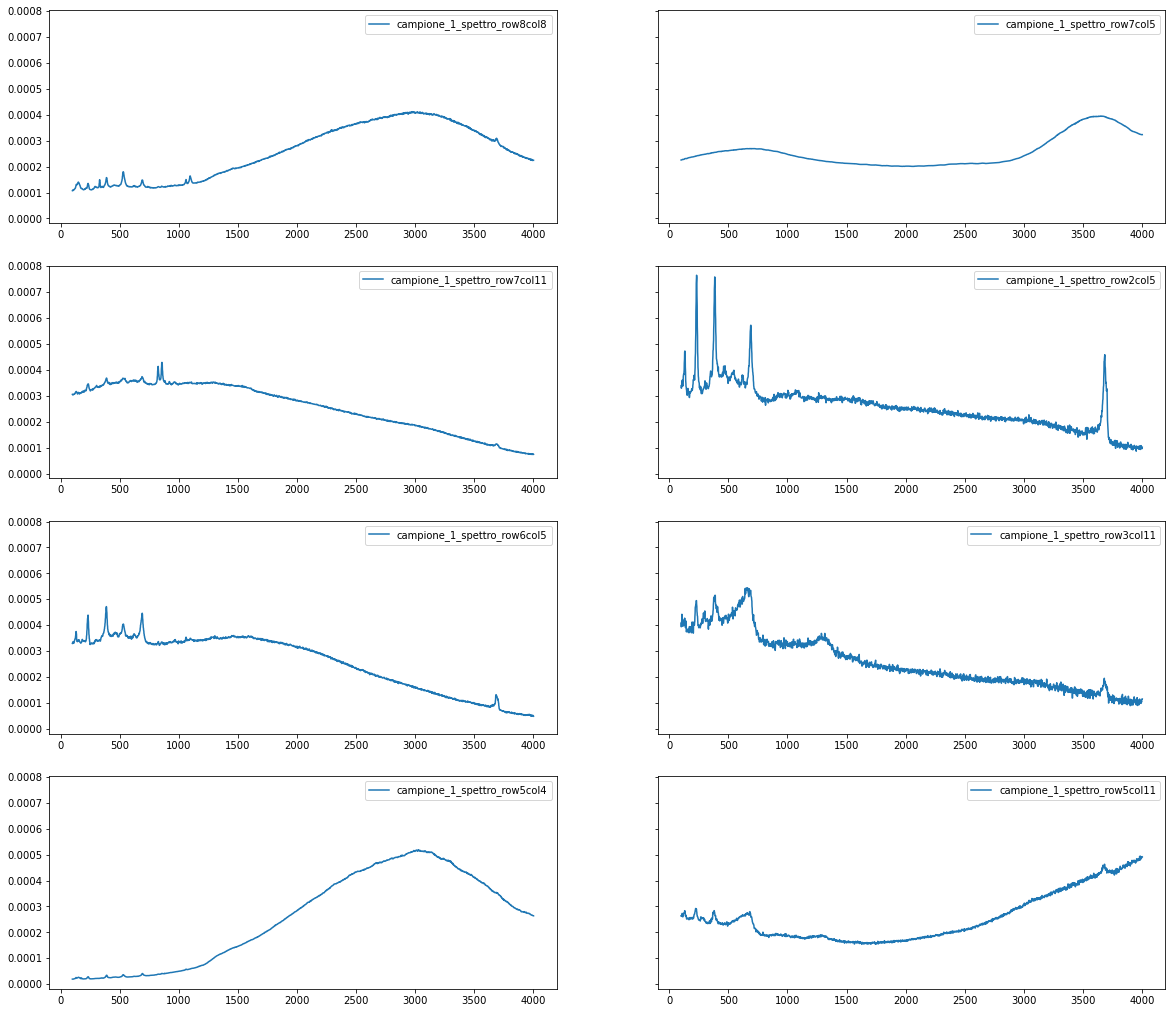

In [13]:
# funziione?
fig,axes = plt.subplots(4,2,figsize=(20,18),sharey=True)
chosen1 = choice(picchi1.data.drop('K',axis=1).columns,4)
chosen2 = choice(picchi2.data.drop('K',axis=1).columns,4)
for n in range(4):
    axes[n,0].plot(picchi1.data['K'],picchi1.data[chosen1[n]], label = f'campione_1_spettro_{chosen1[n]}')
    axes[n,0].legend()
for n in range(4):
    axes[n,1].plot(picchi2.data['K'],picchi2.data[chosen2[n]], label = f'campione_1_spettro_{chosen2[n]}')
    axes[n,1].legend()


### Come funziona scipy.signals.find_peaks?
le proprietà selezionabili come threshold o intervallo di accettazione per la ricerca di picchi sono:

- height : altezza rispetto allo zero 
- width : larghezza rispetto all'altezza in un intervallo di punti adiacenti customizzabile con il parametro **distance**
- prominence : parametro **fondamentale** , determina quello che anhe ad occhio diremo un picco evidente
- threshold


### Come cambia il numero di picchi trovati con i limiti sui nostri parametri?

#### PROMINENCE [spoiler : sarà il parametro favorito per la ricerca dei picchi]

<AxesSubplot:title={'center':'N_peaks found with varying prominence'}>

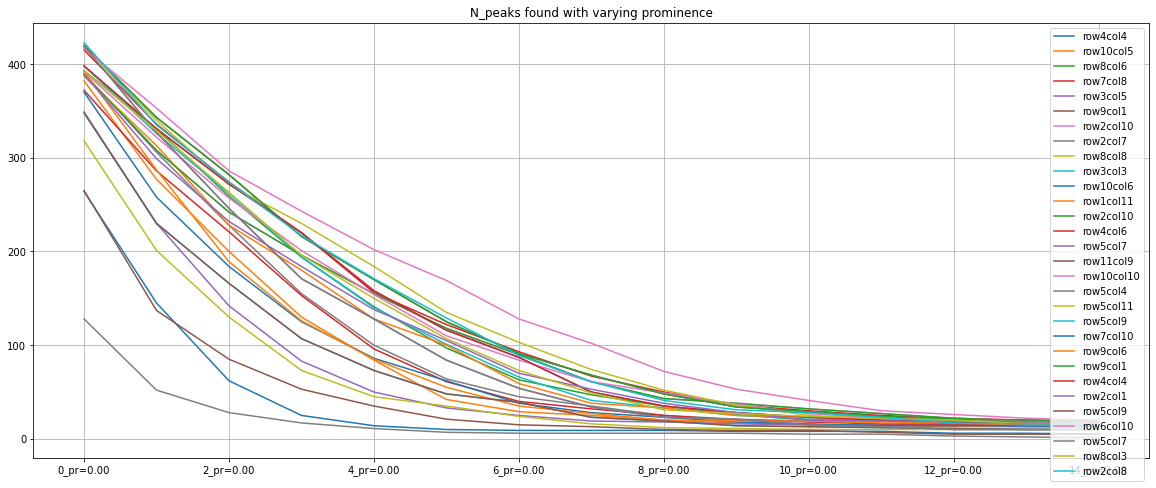

In [16]:
#
#come cambia in funzione della prominence il numero di picchi che vengono trovati?
dic = pd.DataFrame({})
featp = []
for n,pr in enumerate(np.linspace(0.5*10**-6,10**-5,15)): # NOTARE INTERVALLO 10^-6  10^-5 
    cl = classes.Spettri(data1,npicchi=None,prop={'height':(None,None),'prominence':pr, 'width':(None,None)})
   
    cl.peakfinder()
    featp.append(cl.featextract(statlist=['mean','std','count'], cols=['widths','K','peak_heights','prominences']))
    dic[f'{n}_pr={pr:.2f}']= featp[n]['count']
    del cl
    
dic.T.iloc[:,choice([x for x in range(len(dic.T.columns))],30)].plot(figsize=(20,8),grid=True, xlim=(None,None), title='N_peaks found with varying prominence' )


#### HEIGHT [bad]

<AxesSubplot:>

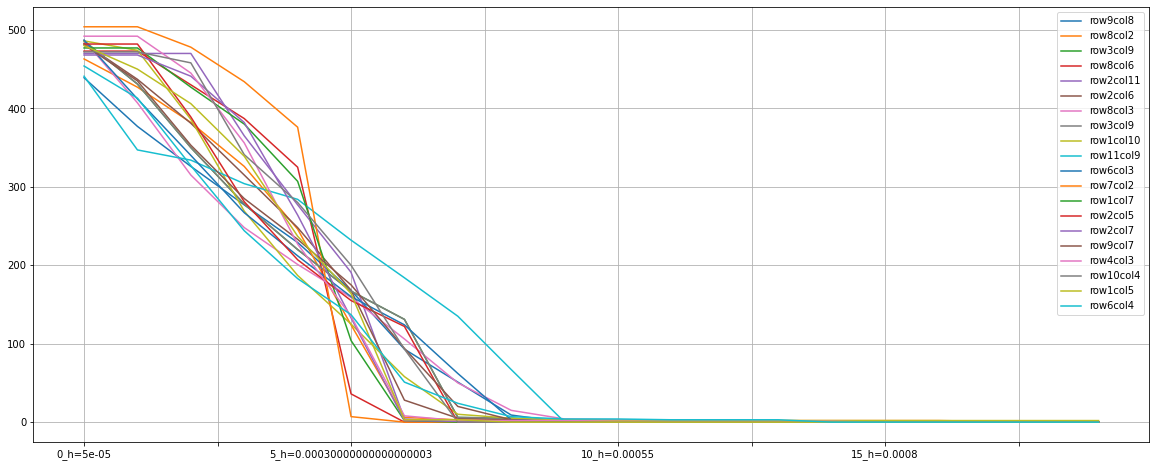

In [42]:
#come cambia in funzione della height il numero di picchi che vengono trovati?
dic = pd.DataFrame({})
feath = []
for n,pr in enumerate(np.linspace(0.5*10**-4,10**-3,20)): # INTERVALLO 10^-6 10-3
    cl = classes.Spettri(data1,npicchi=None,prop={'height':pr,'prominence':(None,None),'width':(None,None)})
    
    cl.peakfinder()
    feath.append(cl.featextract(statlist=['mean','std','count'], cols=['widths','K','peak_heights','prominences']))
    dic[f'{n}_h={pr}']= feath[n]['count']
    del cl
    
dic.T.iloc[:,choice([x for x in range(len(dic.T.columns))],20)].plot(figsize=(20,8),grid=True, xlim=(None,None))


#### WIDTH (SO SO)

Text(0, 0.5, 'n_picchi')

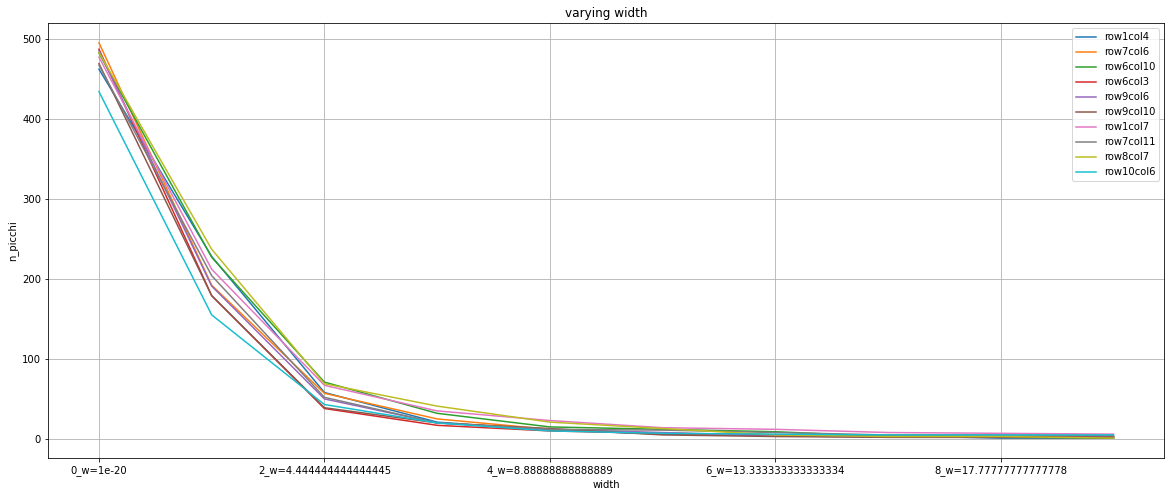

In [12]:
dic = pd.DataFrame({})
featw = []
for n,pr in enumerate(np.linspace(10**-20,20,10)): #INTERVALLO
    cl = classes.Spettri(data1,npicchi=None,prop={'height':(None,None),'prominence':(None,None),'width':pr})
    
    cl.peakfinder()
    featw.append( cl.featextract(statlist=['mean','std','count'], cols=['widths','K','peak_heights','prominences']))
    dic[f'{n}_w={pr}']= featw[n]['count']
    del cl
    
fig =dic.T.iloc[:,choice([x for x in range(len(dic.T.columns))],10)].plot(figsize=(20,8),grid=True, xlim=(None,None), title = 'varying width' )
plt.xlabel('width')
plt.ylabel('n_picchi')


### OSSERVAZIONI:

**PROMINENCE**

- parametro affidabile nel pesare l'importanza relativa dei diversi picchi
 
**WIDTH** ED **HEIGHT**

- meno affidabili l comparazione della relativa importanza tra i picchi

L'approccio che sembra causare meno grane dovute alla diversità possibile degli spettri, è di trovare tutti i picchi senza restrizioni e considerarne solo un numero fissato da *.npicchi*, anche se è possibile procedere in diversi modi per cui avrei anche implementato la classe, possono diventare poco informativi effettivamente.... (eventualmente spiegherò meglio a voce)

## Qualche plot per visualizzare spettri e picchi

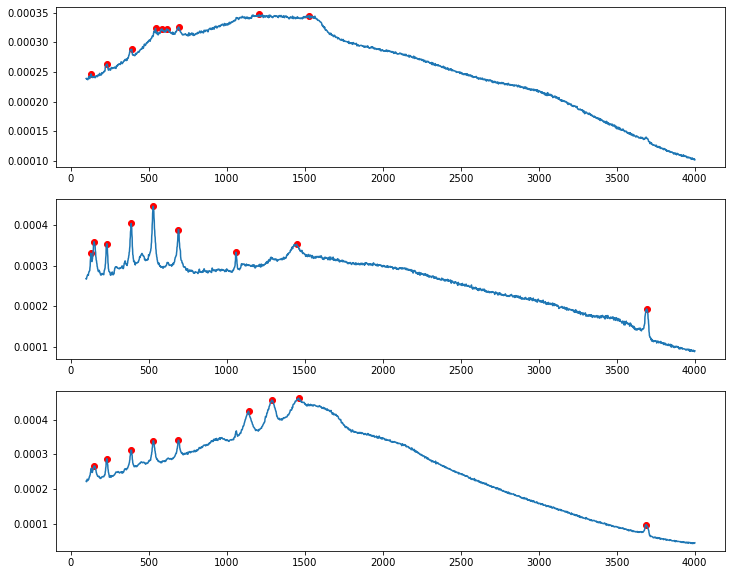

In [27]:
plot_peaks(picchi1)

Passiamo ora al metodo

## *.featextract* 

Utilizzando il contenuto dell'attributo *.picchi* crea per ogni tabella di picchi un riga di aspetti statistici (tra quelli trattati da *pd.DataFrame.describe* di ogni proprietà, immagazzinando le righe in un dataframe all attributo **.feature**
in input opzionali ci sono **proplist** una lista di proprietà tra le colonne di *.picchi* e **statlist** una lista di proprietà tra le statistiche di *pd.DataFrame.describe()*

In [30]:
picchi1.featextract()
picchi1.feature.head()

,prominences_mean,prominences_std,peak_heights_mean,peak_heights_std,K_mean,K_std,widths_mean,widths_std
row1col1,0.000084,0.000053,0.000425,0.000055,627.830289,319.847488,10.837650,4.401790
row1col2,0.000102,0.000122,0.000264,0.000134,976.668600,806.326143,124.543171,340.186513
row1col3,0.000076,0.000030,0.000501,0.000142,842.854411,1098.675361,20.016416,10.924108
row1col4,0.000100,0.000074,0.000441,0.000112,860.746300,1100.643197,11.028482,3.742339
row1col5,0.000067,0.000057,0.000355,0.000075,884.423611,1094.165176,14.310617,7.772406


In [50]:
#sns.pairplot(data = featp[2], vars = ['prominences_std','peak_heights_std','widths_std','count'])

In [31]:
#sns.pairplot(data = featp[10], vars = ['prominences_mean','peak_heights_mean','widths_mean','K_mean','count'])

In [ ]:
#questa è una routine base prima normalizza i dati e poi ne calcola i picchi
# le proprietà sono salvate come attributo dell'istanza [.picchi è un attributo aggiuntivo creato .peakfinder() ]

picchi1.peakfinder()
picchi2.peakfinder()
pass

In [ ]:
#per ora utilizzo un metodo per l'estrazione delle feature senza che esso salvi il risultato in nessun attributo ma ritornandolo
feat_picchi1= picchi1.featextract(cols=['peak_heights','prominences','K'],statlist=['mean','std','count'])
feat_picchi2 = picchi2.featextract(cols=['peak_heights','prominences','K'], statlist=['mean','std','count'])
km1_list= cluster_routine.km_cluster_plt(feat_picchi1,plot=True)
km2_list =  cluster_routine.km_cluster_plt(feat_picchi2.dropna(),plot=True)
feat_picchi1['labels_km']=  km1_list[3].labels_
feat_picchi2['labels_km']= km2_list[3].labels_

In [ ]:
feat_picchi1

In [ ]:
sns.pairplot(data=feat_picchi1,vars=['peak_heights_mean','K_mean','count','prominences_mean'], hue='labels_km')

In [ ]:
sns.pairplot(data=feat_picchi2,vars=['peak_heights_mean','K_mean','count','prominences_mean'], hue='labels_km')

In [ ]:
score1=[]
for x in km1_list:
    
    score1.append(cluster_routine.silhouette_score(feat_picchi1,x.labels_))

In [ ]:
score2=[]
for x in km2_list:
    
    score2.append(cluster_routine.silhouette_score(feat_picchi2,x.labels_))

In [ ]:
score1

In [ ]:
sns.lineplot(data=score1,label='score1')
sns.lineplot(data=score2,label='score2')

In [ ]:
db1list = cluster_routine.db_cluster_plt(feat_picchi1,n_components=2, eps= 0.55, min_samples=4)


In [ ]:
db2list = cluster_routine.db_cluster_plt(feat_picchi2)

In [ ]:
feat_picchi2['labels_db'] = db2list[-2].labels_
feat_picchi1['labels_db'] = db1list[4].labels_

sns.pairplot(data=feat_picchi2,vars=['peak_heights_mean','K_mean','count','prominences_mean'], hue='labels_db')

In [ ]:

sns.pairplot(data=feat_picchi1,vars=['peak_heights_mean','K_mean','count','prominences_mean'], hue='labels_db')